In [138]:
from lxml import etree
import urllib.request as request
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

def clean_plot(leg=True, grid=None, font=None):
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    axis_color = 'lightgrey'
    ax.spines['bottom'].set_color(axis_color)
    ax.spines['left'].set_color(axis_color)
    ax.tick_params(axis='both', color=axis_color)
    
    if leg:
        ax.legend(frameon = False, loc='upper left', bbox_to_anchor=(1, 1))
        
    if grid is not None:
        plt.grid(color='lightgrey', axis = grid, linestyle='-', linewidth=.5)
        
    if font is not None:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_xticklabels() + ax.get_yticklabels()):
            
            item.set_fontfamily(font['family'])
            item.set_color(font['color'])

In [62]:
# root = etree.parse(r"C:\Users\forresthooton\Downloads\drugbank.xml")

root = etree.parse(r"C:\Users\forresthooton\Downloads\full database.xml")

# root = etree.tostring(root)

In [81]:
t = root.findall('./{http://www.drugbank.ca}drug')#[0:10]#[0].xpath('.//text()')

In [85]:
t[0].find('.//{http://www.drugbank.ca}drugbank-id').xpath('./text()')[0]

['DB00001']

In [63]:
links = pd.DataFrame()

i = 0
start = time()
for cat in root.findall(".//{http://www.drugbank.ca}pathway"):
    if cat.findall('.//{http://www.drugbank.ca}category')[0].xpath('./text()')[0] == 'disease':

        pathway_id = cat.findall('.//{http://www.drugbank.ca}smpdb-id')[0].xpath('./text()')[0]
        pathway_name = cat.findall('.//{http://www.drugbank.ca}name')[0].xpath('./text()')[0]

        for d in cat.findall('.//{http://www.drugbank.ca}drug'):
            drug_id = d.findall('.//{http://www.drugbank.ca}drugbank-id')[0].xpath('./text()')[0]
            drug_name = d.findall('.//{http://www.drugbank.ca}name')[0].xpath('./text()')[0]

            links = links.append({
                'pathway_id' : pathway_id,
                'pathway_name' : pathway_name,
                'drug_id' : drug_id,
                'drug_name' : drug_name
            }, ignore_index=True)
    
    if not i % 500:
        print(i, 'loops done in', (time() - start)/ 60, 'min')
    i += 1
    
    

0 loops done in 0.03146691719690959 min
500 loops done in 0.4456002513567607 min
1000 loops done in 0.8033502459526062 min
1500 loops done in 0.9951169451077779 min
2000 loops done in 1.3592503190040588 min
2500 loops done in 2.048089281717936 min
3000 loops done in 2.6741258978843687 min
3500 loops done in 3.425477381547292 min


In [64]:
v = links.drop_duplicates().groupby('pathway_id').agg({'pathway_name' : 'count'}).sort_values('pathway_name').reset_index()
v['px'] = [(i+1) / len(v) for i in range(len(v))]

Text(0.5, 0, 'number of diseases treated by drug')

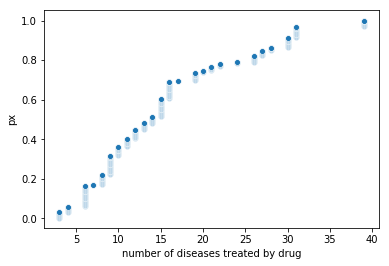

In [65]:
ax = sns.scatterplot('pathway_name', 'px', data=v)
ax.set_xlabel('number of diseases treated by drug')

In [53]:
# num drugs
len(links.drug_id.drop_duplicates())

191

In [54]:
# num diseases
len(links.pathway_id.drop_duplicates())

229

In [57]:
links.groupby('pathway_name').agg({'pathway_id' : 'count'}).sort_values('pathway_id')

,pathway_id
pathway_name,
Long-Chain-3-Hydroxyacyl-CoA Dehydrogenase Deficiency (LCHAD),2
Blue Diaper Syndrome,3
Cystinuria,3
Lactose Intolerance,3
Iminoglycinuria,3
"Homocystinuria, Cystathionine beta-Synthase Deficiency",4
gamma-Cystathionase Deficiency (CTH),4
"Multiple Carboxylase Deficiency, Neonatal or Early Onset Form",4
Joubert Syndrome,4


In [59]:
len(links.drop_duplicates())

3317

In [67]:
t = pd.read_csv(r"C:\Users\forresthooton\Downloads\DCh-Miner_miner-disease-chemical.tsv", sep='\t')

In [69]:
t.columns = ['disease', 'chem']

In [74]:
# t.groupby('chem').agg({'disease':'count'}).sort_values('disease', ascending=False)
len(t.disease.drop_duplicates())

5536

In [75]:
<drugbank-id primary="true">DB00903</drugbank-id>

<targets>
<target>
      <id>BE0000732</id>
      <name>Sodium/potassium-transporting ATPase subunit alpha-1</name>
      <organism>Humans</organism>
      <actions>
        <action>inhibitor</action>

,disease,chem
0,MESH:D005923,DB00564
1,MESH:D009503,DB01072
2,MESH:D016115,DB01759
3,MESH:D018476,DB00451
4,MESH:C567059,DB00641
5,MESH:D010198,DB00481
6,MESH:D007898,DB04173
7,MESH:C574275,DB00636
8,MESH:D001249,DB00814
9,MESH:C535836,DB00091


In [156]:
def extract_target_info(info):
    if info is not None:
        if len(info.xpath('./text()')) == 0:
            return np.nan
        else:
            return info.xpath('./text()')[0]
    else:
        return np.nan

links = pd.DataFrame()

i = 0
start = time()
for drug in root.findall('./{http://www.drugbank.ca}drug'):
    drug_id = drug.find('./{http://www.drugbank.ca}drugbank-id').xpath('./text()')[0]
    drug_name = drug.find('./{http://www.drugbank.ca}name').xpath('./text()')[0]
    
    if len(drug.find('./{http://www.drugbank.ca}cas-number').xpath('./text()')) > 0:
        drug_cas = drug.find('./{http://www.drugbank.ca}cas-number').xpath('./text()')[0]
    else:
        drug_cas = np.nan
    
    

    for target in drug.find('.//{http://www.drugbank.ca}targets').findall('./{http://www.drugbank.ca}target'):
        target_id = extract_target_info(target.find('./{http://www.drugbank.ca}id'))
        target_name = extract_target_info(target.find('./{http://www.drugbank.ca}name'))
        target_org = extract_target_info(target.find('./{http://www.drugbank.ca}organism'))
        target_amino = extract_target_info(target.find('.//{http://www.drugbank.ca}amino-acid-sequence'))
        target_gene = extract_target_info(target.find('.//{http://www.drugbank.ca}gene-sequence'))
        
        if len(target.findall('.//{http://www.drugbank.ca}action')) > 0:
            target_actions = [a.xpath('./text()')[0] for a in target.findall('.//{http://www.drugbank.ca}action')]
        else:
            target_actions = np.nan

        links = links.append({
            'drug_id' : drug_id,
            'drug_name' : drug_name,
            'drug_cas' : drug_cas,
            'target_id' : target_id,
            'target_name' : target_name,
            'target_organism' : target_org,
            'target_actions' : target_actions,
            'target_amino' : target_amino,
            'target_gene' : target_gene
        }, ignore_index=True)
    
    if not i % 500:
        print(i, 'loops done in', (time() - start)/ 60, 'min')
    i += 1

0 loops done in 0.0002000570297241211 min
500 loops done in 0.22110526164372762 min
1000 loops done in 0.3925562262535095 min
1500 loops done in 0.5272403478622436 min
2000 loops done in 0.6645418246587117 min
2500 loops done in 0.7927476922671001 min
3000 loops done in 0.9264652172724406 min
3500 loops done in 1.1030110637346904 min
4000 loops done in 1.2764347076416016 min
4500 loops done in 1.4665513515472413 min
5000 loops done in 1.5933513561884562 min
5500 loops done in 1.7063179691632588 min
6000 loops done in 1.8337846398353577 min
6500 loops done in 1.9987680276234945 min
7000 loops done in 2.175001343091329 min
7500 loops done in 2.3654846946398416 min
8000 loops done in 2.4719013929367066 min
8500 loops done in 2.51390141248703 min
9000 loops done in 2.5321782787640887 min
9500 loops done in 2.5456350843111673 min


No handles with labels found to put in legend.


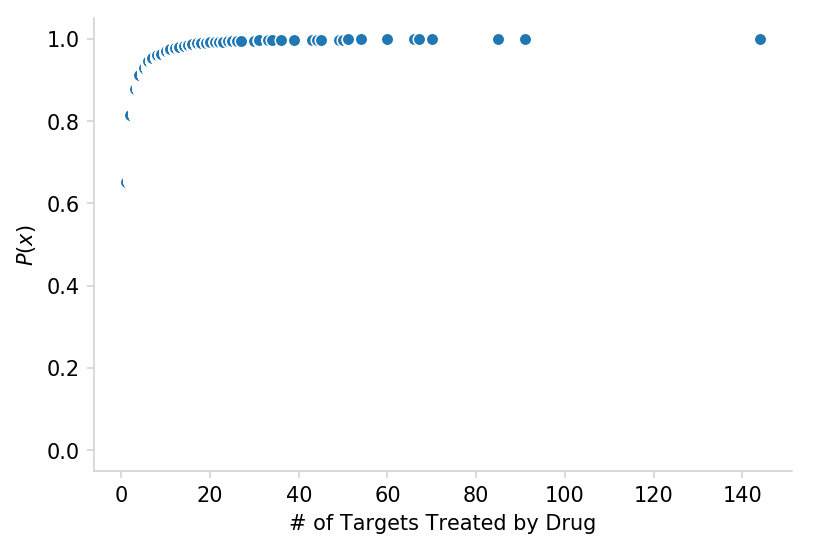

In [150]:
v = links.groupby('drug_id').agg({'drug_name' : 'count'}).sort_values('drug_name').reset_index()
v['px'] = [(i+1) / len(v) for i in range(len(v))]

ax = sns.scatterplot('drug_name', 'px', data=v)
ax.set_xlabel('# of Targets Treated by Drug')
ax.set_ylabel('$P(x)$')

clean_plot()

No handles with labels found to put in legend.


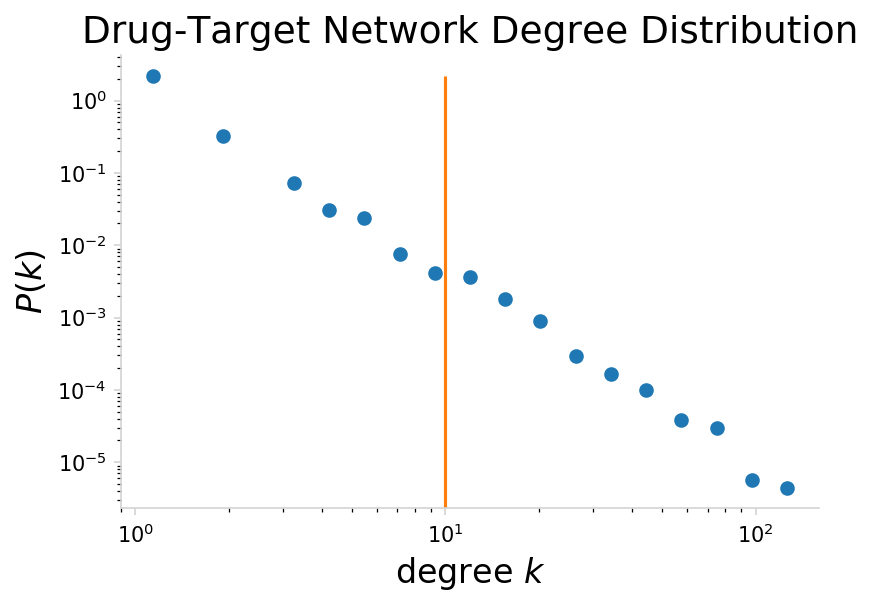

In [165]:
def plot_degree_dist(degree_dist, num_bins=10):
    kmin = min(degree_dist)
    kmax = max(degree_dist)
    
    # Get num_bins logarithmically spaced bins between kmin and kmax
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=num_bins)

    # histogram the data into these bins
    density, _ = np.histogram(degree_dist, bins=bin_edges, density=True)
    

    fig = plt.figure(figsize=(6,4))

    # "x" should be midpoint (IN LOG SPACE) of each bin
    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)

    plt.loglog(x, density, marker='o', linestyle='none')
    plt.title('Drug-Target Network Degree Distribution', fontsize = 18)
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    
    plt.vlines(10, ymin=min(log_be), ymax=max(log_be), color='tab:orange')

    clean_plot()

    plt.show()

plot_degree_dist(v.drug_name.dropna().tolist(), num_bins=20)

In [152]:
print('Number of drugs:', len(links.drug_id.drop_duplicates()))
print('Number of targets:', len(links.target_id.drop_duplicates()))
print('Number of interactions:', len(links))

Number of drugs: 6835
Number of targets: 4217
Number of interactions: 15709


In [159]:
# links[['drug_id', 'target_id']].to_csv('drug_target_links.csv', index=False)

In [160]:
links

,drug_cas,drug_id,drug_name,target_actions,target_amino,target_gene,target_id,target_name,target_organism
0,138068-37-8,DB00001,Lepirudin,[inhibitor],>lcl|BSEQ0016004|Prothrombin\nMAHVRGLQLPGCLALA...,>lcl|BSEQ0016005|Prothrombin (F2)\nATGGCGCACGT...,BE0000048,Prothrombin,Human
1,205923-56-4,DB00002,Cetuximab,[antagonist],>lcl|BSEQ0001530|Epidermal growth factor recep...,>lcl|BSEQ0019007|Epidermal growth factor recep...,BE0000767,Epidermal growth factor receptor,Human
2,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0010635|Low affinity immunoglobulin g...,>lcl|BSEQ0010636|Low affinity immunoglobulin g...,BE0000901,Low affinity immunoglobulin gamma Fc region re...,Human
3,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0011518|Complement C1r subcomponent\n...,>lcl|BSEQ0011519|Complement C1r subcomponent (...,BE0002093,Complement C1r subcomponent,Human
4,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0016678|Complement C1q subcomponent s...,>lcl|BSEQ0016679|Complement C1q subcomponent s...,BE0002094,Complement C1q subcomponent subunit A,Human
5,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0016676|Complement C1q subcomponent s...,>lcl|BSEQ0016677|Complement C1q subcomponent s...,BE0002095,Complement C1q subcomponent subunit B,Human
6,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0011520|Complement C1q subcomponent s...,>lcl|BSEQ0011521|Complement C1q subcomponent s...,BE0002096,Complement C1q subcomponent subunit C,Human
7,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0004112|Low affinity immunoglobulin g...,>lcl|BSEQ0011522|Low affinity immunoglobulin g...,BE0002097,Low affinity immunoglobulin gamma Fc region re...,Human
8,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0011082|Complement C1s subcomponent\n...,>lcl|BSEQ0011083|Complement C1s subcomponent (...,BE0001529,Complement C1s subcomponent,Human
9,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0001416|High affinity immunoglobulin ...,>lcl|BSEQ0016183|High affinity immunoglobulin ...,BE0000710,High affinity immunoglobulin gamma Fc receptor I,Human
